## 3. Análise Exploratória com Dados Limpos  
📒 `2.1-rc-eda-cleaned.ipynb`

**Objetivo:** Explorar os dados tratados por meio de estatísticas descritivas e visualizações gráficas para identificar padrões, tendências e possíveis relações entre variáveis.

📊 **Atividades:**
- Relação entre Variáveis Númericas (scatterplots, heatmap)
- Relação entre Variáveis Categóricas e o Alvo (`price`)
- Insights Relevantes
- Next Steps


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import sys
from _utils import classificar_correlacao


sys.path.append("../src")  # adiciona o caminho da pasta src

# Setup para mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Desabilita mensagens de FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [52]:
file_path = "../data/processed/car_price_cleaned.csv"
df = pd.read_csv(file_path)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,risk_classification,price-binned,avg-fuel-consumption
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,high,medium,10.2
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,high,medium,10.2
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,moderate,medium,9.6
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,high,medium,11.5
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,high,medium,8.5


#### Variáveis Numéricas

**Insights esperados**:
- Quais são as minhas variáveis númericas que existe correlação significativa com o a variável alvo `price`? Qual a força dessa correlação? Qual a relação linear?

In [53]:
# Deletar as colunas de `city-mpg` e `highway-mpg`,  em virtude da variável derivada que foi criada de consumo médio `avg-fuel-consumption`
# Deletar `symboling` variável categórica classificada por 'risk-classification'  
df.drop(['city-mpg', 'highway-mpg', 'symboling'], axis=1, inplace=True)

In [54]:
# Estatistica Descritiva
df.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,price,avg-fuel-consumption
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,120.827225,98.276963,172.826702,65.670157,53.738220,2484.670157,118.858639,3.306492,3.251257,10.182827,98.282723,5128.795812,11477.874346,12.212042
std,32.782320,5.267057,11.347755,1.902242,2.430693,449.312412,27.473929,0.264992,0.303469,4.005299,33.147099,472.572039,4929.765412,2.682342
min,65.000000,86.600000,141.100000,60.300000,48.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,7.900000
25%,96.500000,94.500000,166.300000,64.000000,52.000000,2128.000000,97.000000,3.130000,3.115000,8.700000,70.000000,4800.000000,7713.500000,10.000000
50%,115.000000,96.500000,172.600000,65.400000,54.100000,2395.000000,110.000000,3.270000,3.290000,9.000000,94.000000,5200.000000,9988.000000,11.900000
75%,141.000000,100.400000,178.300000,66.500000,55.500000,2828.500000,136.000000,3.540000,3.410000,9.400000,114.000000,5500.000000,14954.500000,14.350000
max,256.000000,114.200000,198.900000,72.300000,59.800000,3750.000000,203.000000,3.940000,3.900000,23.000000,288.000000,6600.000000,28248.000000,21.900000


In [55]:
# Seleciona as variáveis numéricas
features_numeric = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

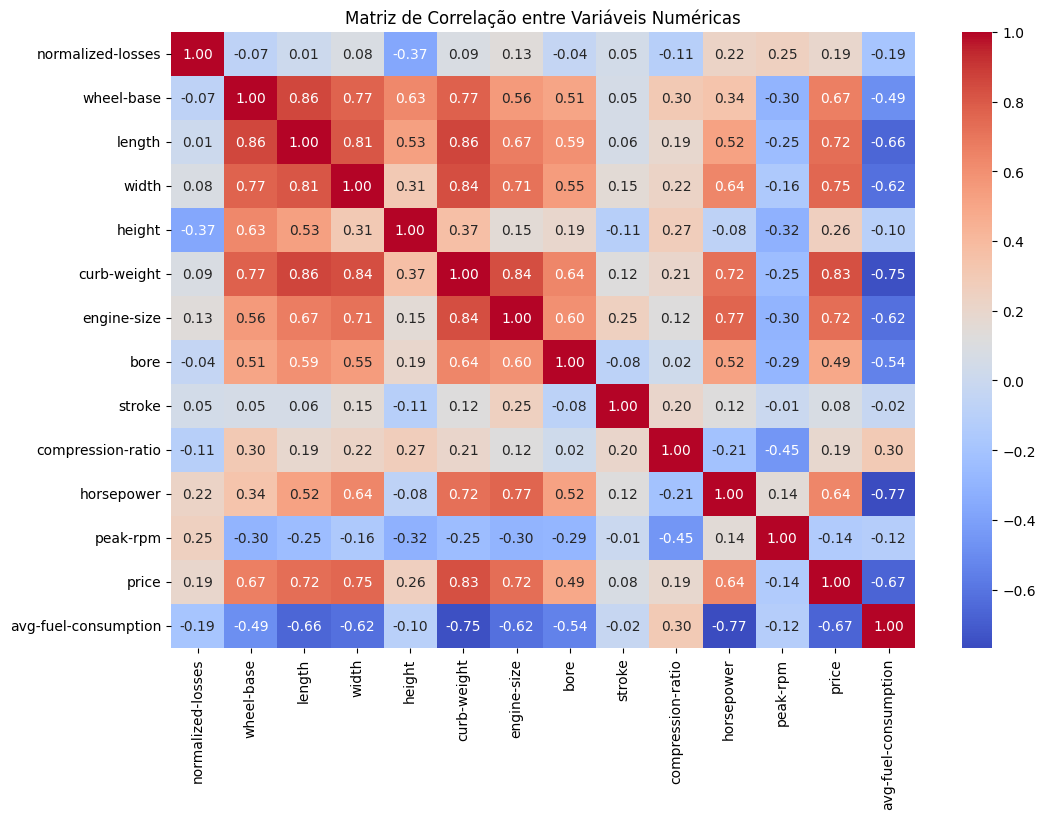

In [56]:
# Matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(df[features_numeric].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.savefig('../reports/figures/eda_heatmap_correlation')



**STEP 01:** Selecionar as variáveis preditoras que possuem correlação forte ou muito forte com a variável alvo `price`. Aqui iremos verificar se existe correlação e qual a a sua força e se a relação é linear positiva ou negativa.

**NOTA:** Considerar o nível de confiança alpha=0.05 (para um intervalo de 95% de confiança)

- i) **p-value(p):** verifica se existe ou não correlação dentro de um intervalo de confiança de 95%
    - P-value > 0.05    Ho = ***não há diferança ou correlação significativa***
    - P-value < 0.05    Ha = ***há diferença ou correlação significativa***
- ii) **pearson_correlation(r):** medir a força da correlação, sendo que (+) a correlação é positiva, (-) a correlação é negativa.

| Valor de r (+ ou -) | Interpretação           |
|---------------------|-------------------------|
| 0.00 a 0.19         | correlação muito fraca  |
| 0.20 a 0.39         | correlação fraca        |
| 0.40 a 0.69         | correlação moderada     |
| 0.70 a 0.89         | correlação forte        |
| 0.90 a 1.00         | correlação muito forte  |

Fonte: SHIMAKURA, Silvia Emiko. Interpretação do coeficiente de correlação. LEG, UFPR,. 2006.

In [57]:
# Seleciona as variáveis preditoras com forte correlação r > 0.70
# `avg-fuel-consumption` e `horsepower` foram classificados como correlação  moderada, ambos obtiveram seu valor de "r" igual a 0.67 e 0.64 respectivamente. 
# Entretanto o cliente pediu que considerasse estas duas variáveis de acordo com sua experiência de mercado, com isto consideramos com ~0.7 (forte)

numeric_feature_corr_list = ['curb-weight','length','width','engine-size', 'avg-fuel-consumption','horsepower', 'price'] 

df_corr = df[numeric_feature_corr_list]

for col in numeric_feature_corr_list:
    result = classificar_correlacao(x=df_corr[col], y=df['price'])
    print(f"{col} : {result}\n")


df_corr.head()

curb-weight : {'correlacao': np.float64(0.8329579461387322), 'p_valor': np.float64(1.8469932605939318e-50), 'classificacao': 'Uma correlação forte'}

length : {'correlacao': np.float64(0.7248540797477706), 'p_valor': np.float64(2.0542940625449698e-32), 'classificacao': 'Uma correlação forte'}

width : {'correlacao': np.float64(0.7528080340607874), 'p_valor': np.float64(3.625531520243547e-36), 'classificacao': 'Uma correlação forte'}

engine-size : {'correlacao': np.float64(0.7242024604397928), 'p_valor': np.float64(2.480955270624188e-32), 'classificacao': 'Uma correlação forte'}

avg-fuel-consumption : {'correlacao': np.float64(-0.6653440208415172), 'p_valor': np.float64(8.789457382754789e-26), 'classificacao': 'Uma correlação moderada'}

horsepower : {'correlacao': np.float64(0.639391229035334), 'p_valor': np.float64(2.4075465770924173e-23), 'classificacao': 'Uma correlação moderada'}

price : {'correlacao': np.float64(1.0), 'p_valor': np.float64(0.0), 'classificacao': 'Uma correlação

,curb-weight,length,width,engine-size,avg-fuel-consumption,horsepower,price
0,2548,168.8,64.1,130,10.2,111,13495
1,2548,168.8,64.1,130,10.2,111,16500
2,2823,171.2,65.5,152,9.6,154,16500
3,2337,176.6,66.2,109,11.5,102,13950
4,2824,176.6,66.4,136,8.5,115,17450


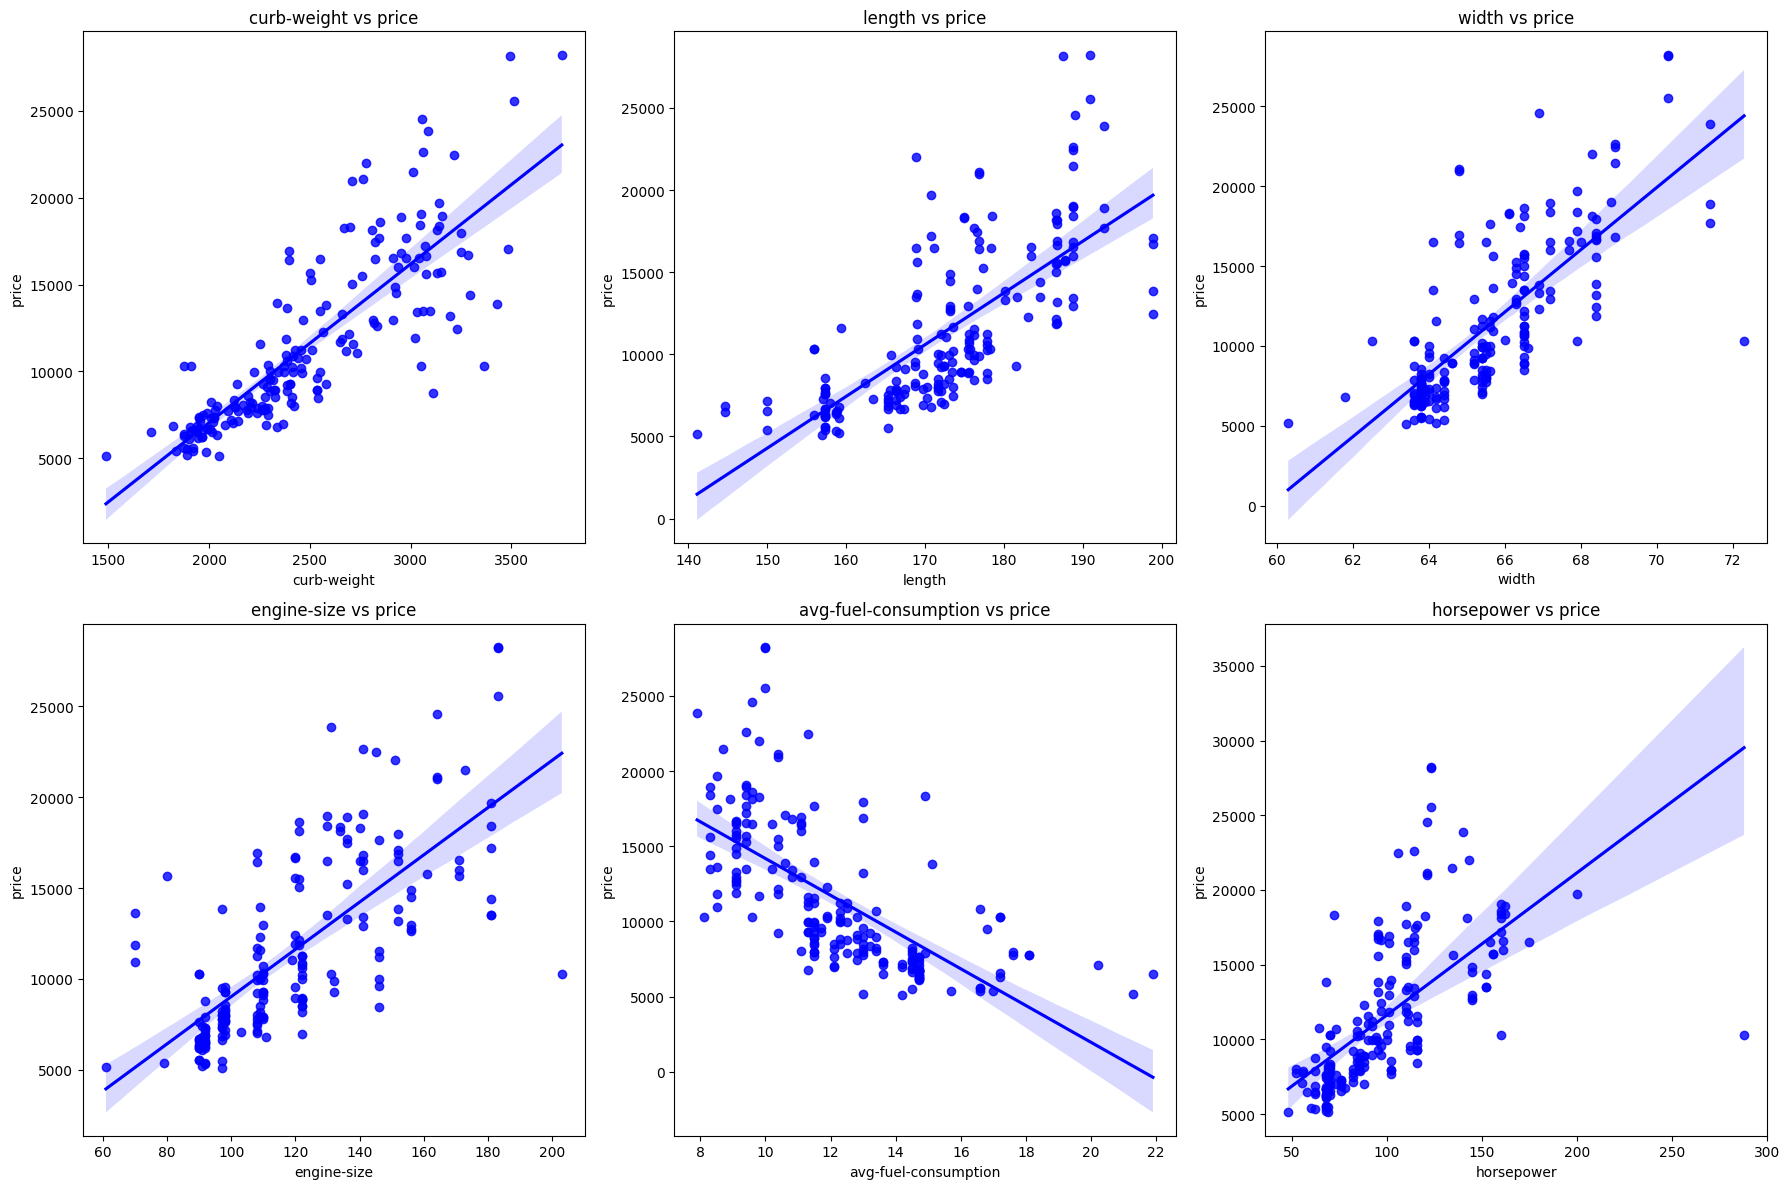

In [58]:
# Criando uma matriz de gráficos de regressão (scatter com linha de regressão)
num_cols = 3
num_rows = int(np.ceil(len(numeric_feature_corr_list[:-1]) / num_cols))  # Exclui 'price' como y

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

for i, feature in enumerate(numeric_feature_corr_list[:-1]):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    sns.regplot(x=feature, y='price', data=df_corr, color='blue', ax=ax)
    ax.set_title(f'{feature} vs price')

# Esconde eixos vazios, se houver
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
fig.savefig('../reports/figures/eda_scatterplot_correlation')

#### 📌INSIGHT:
- Das 13 variáveis númericas preditoras, foi considerado 6 destas como correlação forte | muito forte (r >=|0.70|) com a variável alvo `price`
- Das 6 variáveis correlacionadas, 100% refere-se a caracteristicas técnicas do carro. `curb-weight`,`length`,`width`, `engine-size`, `avg-fuel-consumption`, `horsepower`
- 50% destas são classificadas como caracteristicas relacioadas ao chassi (`body`): `curb-weight`,`length`,`width`.
- 50% restantes classificadas como caracteristicas de motor (`powertrain`): `engine-size`, `avg-fuel-consumption`, `horsepower`
- A feature `avg-fuel-consumption` apresentou uma correlação linear negativa, ou seja, podemos concluir que os preços mais altos estão relacionados com carros mais potente, logo o consumo será menor.

Com esta primeira etapa, conseguimos identificar alguns padrões de consumo, o perfil do mercado preferem veículos maiores e mais potentes do que carros menores, menos potente e maior consumo médio.

In [ ]:
# Histograma para distribuição (em matriz de subplots)
n = len(features_numeric)
cols = 3  # número de colunas da matriz de gráficos
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*3))
axes = axes.flatten()

for i, col in enumerate(features_numeric):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribuição - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

# Remove eixos extras se houver
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.savefig('../reports/figures/eda_hist_numerical')
plt.show()

#### Variáveis Categóricas


In [73]:
# Contagem de categorias (em matriz de subplots)
categorical_features = df.select_dtypes(include=['object']).columns.to_list()
n = len(categorical_features)
cols = 3
rows = (n + cols - 1) // cols

In [ ]:
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    ax=axes[i]
    counts = df[col].value_counts()
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i] )
    axes[i].set_title(f'Contagem - {col}')
    axes[i].tick_params(axis='x', rotation=45)

        # Adiciona labels nas barras
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
fig.savefig('../reports/figures/eda_hist_categorical')
plt.show()

In [ ]:
# Boxplot entre variáveis categóricas e alvo (price)
if 'price' in df.columns:
    n = len(categorical_features)
    cols = 2
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
    axes = axes.flatten()

    for i, col in enumerate(categorical_features):
        sns.boxplot(data=df, x=col, y='price', order=df[col].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Preço por Categoria - {col}')
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()